In [1]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# **STATS 306 Homework 2**

### Problem 1: Registered pets in Seattle, WA: Warm Up (1 point)

In this problem, we will explore the *Seattle Pets* data set, which contains information about registered pets in Seattle, WA, between 2003 and 2018. The data set can be loaded by running the code below.

In [2]:
data <- read.csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-03-26/seattle_pets.csv")

**(a)** Print only the first 3 rows of the data set. *(0.25 points)*

In [3]:
# YOUR SOLUTION HERE

data %>% head(3)

,license_issue_date,license_number,animals_name,species,primary_breed,secondary_breed,zip_code
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,November 16 2018,8002756,Wall-E,Dog,"Mixed Breed, Medium (up to 44 lbs fully grown)",Mix,98108
2,November 11 2018,S124529,Andre,Dog,"Terrier, Jack Russell","Dachshund, Standard Wire Haired",98117
3,November 21 2018,903793,Mac,Dog,"Retriever, Labrador",NA,98136


**(b)** Create a data set that contains all columns of the original data set except `secondary_breed`. Then, drop rows with any missing values. Assign the resulting data set to the variable `data_nona`. *(0.25 points)*

In [19]:
# YOUR SOLUTION HERE

data_nona <- data %>%
  select(-secondary_breed) %>%
  na.omit()

**(c)** Display the proportion of each species in `data_nona`. Make sure to round the numbers to 4 decimal places. *(0.25 points)*

In [21]:
# YOUR SOLUTION HERE

data_nona %>%
  count(species, sort = TRUE) %>%
  mutate(prop = n / sum(n)) %>%
  mutate(prop = round(prop, 4)) %>%
  select(-n) %>%
  print()

  species   prop
1     Dog 0.6745
2     Cat 0.3247
3    Goat 0.0007
4     Pig 0.0001


**(d)** What are the top 3 dog names in `data_nona`? *(0.25 points)*

In [ ]:
# YOUR SOLUTION HERE

data_nona %>%
  filter(species == 'Dog') %>%
  count(animals_name, sort = TRUE) %>%
  head(3) %>%
  print()

  animals_name   n
1         Lucy 335
2      Charlie 306
3        Bella 245


The top 3 dog names are Lucy (used 335 times), Charlie (used 306 times) and Bella (used 245 times).

### Problem 2: Registered pets in Seattle, WA: In-Depth Analysis (4 points)

Before attempting this problem, you may want to read the following resources. If you prefer to learn from examples, feel free to jump straight into the examples for each function provided below.
1. https://stringr.tidyverse.org/reference/str_length.html
2. https://stringr.tidyverse.org/reference/str_detect.html
3. https://stringr.tidyverse.org/reference/str_sub.html
4. https://stringr.tidyverse.org/reference/word.html

You will learn more about working with text data the week after your midterm exam.

In [ ]:
# str_length outputs the number of characters in a string

str_length('I am a cat') # there are 10 characters in the string, including spaces
str_length('R') # there is 1 character in the string

[1] 10

[1] 1

In [ ]:
# str_detect outputs whether a substring is present in a string

str_detect('I am a cat', 'cat') # substring 'cat' is present in the string
str_detect('I am a cat', 'dog') # substring 'dog' is not present in the string

[1] TRUE

[1] FALSE

In [ ]:
# str_sub outputs a substring of a string given starting and ending positions

str_sub('I am a cat', -3, -1) # obtains substring from position -3 (third from last) to -1 (last)
str_sub('I am a cat', 3, 4) # obtains substring from position 3 to 4

[1] "cat"

[1] "am"

In [ ]:
# word outputs the n-th word in the string

word('I am a cat', 2) # obtains the second word in the string
word('I am a cat', -1) # obtains the last word in the string

[1] "am"

[1] "cat"

Now, here are the questions.

**(a)** Use `data_nona`. On average, are cat names longer or shorter or longer as compared to dog names? Use the `mean()` and `str_length()` functions in your answer. *(0.5 points)*

In [ ]:
# YOUR SOLUTION HERE

data_nona %>%
  filter(species %in% c('Cat', 'Dog')) %>%
  mutate(name_len = str_length(animals_name)) %>%
  group_by(species) %>%
  summarize(avg_len = mean(name_len)) %>%
  print()

# A tibble: 2 × 2
  species avg_len
  <chr>     <dbl>
1 Cat        5.92
2 Dog        5.71


On average, cat names are longer as compared to dog names.

**(b)** In `data_nona`, what is the longest cat name? How many characters (including spaces) does the name contain? *(0.5 points)*

In [ ]:
# YOUR SOLUTION HERE

data_nona %>%
  filter(species == 'Cat') %>%
  mutate(name_len = str_length(animals_name)) %>%
  arrange(desc(name_len)) %>%
  head(2) %>%
  print()

  license_issue_date license_number
1      April 11 2018        S104453
2      April 07 2018        S140854
                                   animals_name species      primary_breed
1 Her Ladyship Princess Penelope Peachfuzz Howe     Cat Domestic Shorthair
2         King Charles Leon the First aka Chuck     Cat         Maine Coon
  zip_code name_len
1    98107       45
2    98115       37


The longest cat name is *Her Ladyship Princess Penelope Peachfuzz Howe*. It contains 45 characters.

**(c)** Add a column called `year` to `data_dog`. As the name suggests, this column extracts the year from the column `license_issue_date`. The function `str_sub()` or `word()` might be helpful here.

Which year saw the highest number of registered dogs? *(0.5 points)*

In [ ]:
# YOUR SOLUTION HERE

data_dog <- data_dog %>%
  mutate(year = str_sub(license_issue_date, -4, -1))

# alternatively, we can use the function `word`
# data_dog <- data_dog %>%
#   mutate(year = word(license_issue_date, -1))

data_dog %>%
  count(year, sort = TRUE) %>%
  print()

  year     n
1 2018 22608
2 2017 10965
3 2016  1044
4 2015   202
5 2014    12
6 2008     2
7 2004     1
8 2011     1
9 2012     1


Year 2018 saw the highest number of registered dogs.

**(d)** Focus on years 2016, 2017 and 2018 in `data_dog`. *Without introducing any intermediate variables*, display the proportions of Retrievers, Terriers and Others *within each year*, rounded to 3 decimal places.

From these proportions, what can you say about the popularity of Terriers across the years? *(0.75 points)*

In [ ]:
# YOUR SOLUTION HERE

data_dog %>%
  filter(year %in% c('2016', '2017', '2018')) %>%
  count(year, dog_type) %>%
  group_by(year) %>%
  mutate(freq = n / sum(n)) %>%
  mutate(freq = round(freq, 3)) %>%
  ungroup() %>%
  print()

# A tibble: 9 × 4
  year  dog_type      n  freq
  <chr> <chr>     <int> <dbl>
1 2016  Other       656 0.628
2 2016  Retriever   214 0.205
3 2016  Terrier     174 0.167
4 2017  Other      7022 0.64 
5 2017  Retriever  2340 0.213
6 2017  Terrier    1603 0.146
7 2018  Other     14952 0.661
8 2018  Retriever  4572 0.202
9 2018  Terrier    3084 0.136


In 2016, around 16.7% of registered dogs were Terriers. This number became 14.6% in 2017 and 13.6% in 2018. There was a slight decline in the popularity of Terriers across these 3 years.

**(f)** In `data_nona`, which month sees the highest $\frac{\textrm{number of registered cats}}{\textrm{number of registered dogs}}$? The function `word()` might be helpful here. *(0.75 points)*



In [ ]:
# YOUR SOLUTION HERE

data_nona %>%
  mutate(month = word(license_issue_date, 1)) %>%
  group_by(month) %>%
  summarize(number_cats = sum(species == 'Cat'),
            number_dogs = sum(species == 'Dog')) %>%
  ungroup() %>%
  mutate(ratio = number_cats / number_dogs) %>%
  arrange(desc(ratio)) %>%
  print()

# A tibble: 12 × 4
   month     number_cats number_dogs ratio
   <chr>           <int>       <int> <dbl>
 1 October          1827        3195 0.572
 2 December         1864        3455 0.540
 3 August           1518        2835 0.535
 4 November         1699        3269 0.520
 5 September        1341        2682 0.5  
 6 January          1156        2426 0.477
 7 July             1547        3294 0.470
 8 April            1369        3104 0.441
 9 February          996        2276 0.438
10 June             1267        2969 0.427
11 May              1232        2917 0.422
12 March             952        2414 0.394


The month October sees the highest cats-to-dogs ratio, which is 0.572.

### Problem 3: Air Quality (3 points)

In this problem, we will explore *Air Quality* dataset, which includes daily air quality measurements in New York, May to September 1973. It is a build-in dataset in R so we can directly load the dataset. Use `help` or `?` to get the description of dataset.

In [4]:
# ?airquality
airquality %>% head()

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
5,NA,NA,14.3,56,5,5
6,28,NA,14.9,66,5,6


**(a)** What is the total number of missing values in the dataset? How many columns have at least one missing value? How many days (observations) have missing values? *(0.5 point)*
Show your code to derive these answers to receive full credit

In [5]:
#YOUR SOLUTION HERE

airquality %>%
  is.na() %>%
  colSums()

airquality %>%
  filter(is.na(Ozone) | is.na(Solar.R)) %>%
  dim()

# Alternative
# nona_dim <- airquality %>% na.omit() %>% dim()
# dim(airquality)[1] - nona_dim[1]

# There are 37+7=44 missing values.
# Ozone and Solar.R have missing values.
# There are 42 days having missing value.

Ozone Solar.R    Wind    Temp   Month     Day 
     37       7       0       0       0       0

[1] 42  6

**(b)** Generate a line plot with dots reflecting the variation of monthly temperature and ozone level using mean value. What can you learn from the plot? Provide a brief description over the relationship between temperature and ozone. Make sure to add appropriate title and labels to the plot. *(1.5 points)*

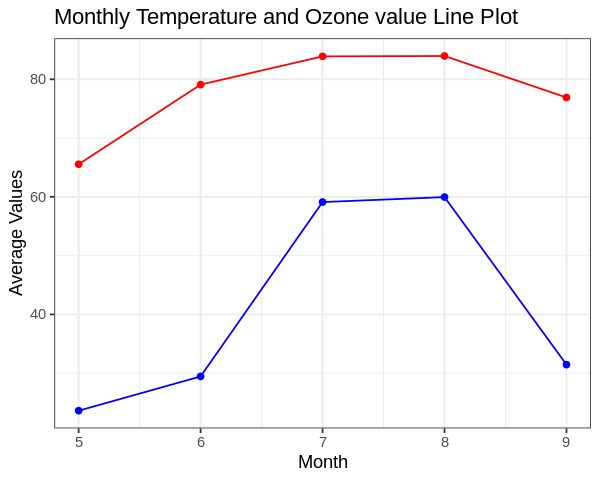

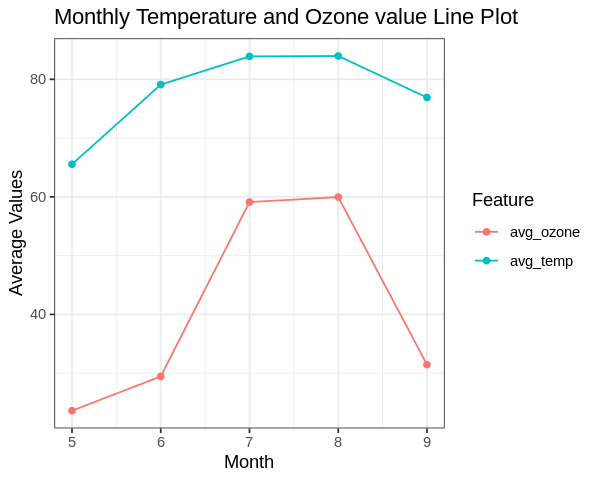

In [ ]:
# YOUR SOLUTION HERE

airquality %>%
  group_by(Month) %>%
  summarize(avg_temp = mean(Temp, na.rm=TRUE),
            avg_ozone = mean(Ozone, na.rm=TRUE)) %>%
  ggplot() +
    geom_line(aes(x=Month, y=avg_temp), color="red") +
    geom_point(aes(x=Month, y=avg_temp), color="red") +
    geom_line(aes(x=Month, y=avg_ozone), color="blue") +
    geom_point(aes(x=Month, y=avg_ozone), color="blue") +
    labs(x = "Month", y = "Average Values") +
    ggtitle("Monthly Temperature and Ozone value Line Plot") +
    theme_bw()

# Alternative
airquality %>%
  group_by(Month) %>%
  summarize(avg_temp = mean(Temp, na.rm=TRUE),
            avg_ozone = mean(Ozone, na.rm=TRUE)) %>%
  pivot_longer(cols=c("avg_temp", "avg_ozone"),
               names_to="Feature",
               values_to="avg_value") %>%
  ggplot(aes(x=Month, y=avg_value, color=Feature)) +
    geom_line() +
    geom_point() +
    labs(x = "Month", y = "Average Values") +
    ggtitle("Monthly Temperature and Ozone value Line Plot") +
    theme_bw()

# It seems that ozone level and temperature has similar trends.
# Higher temperature tends to have higher ozone level on average.

### Problem 4: Gapminder (2 points)
In this problem, we will explore dataset *Gapminder* on life expectancy, GDP per capita, and population by country. It is an excerpt from the [Gapminder](https://www.gapminder.org/data/) data.

In [7]:
install.packages("gapminder")
library(gapminder)
gapminder %>% head()

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


**(a)** Draw a bar plot to visualize the **ratio** of GDP by continent by year. We define GDP $:=$ GDP per Capita $\times$ population. *(1.5 point)*

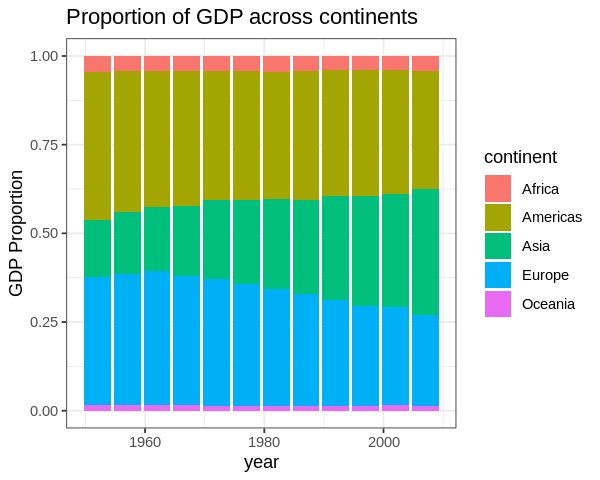

In [17]:
# YOUR SOLUTION HERE

gapminder %>%
  mutate(GDP = gdpPercap * pop) %>%
  group_by(year, continent) %>%
  summarize(cont_GDP = sum(GDP), .groups = "keep") %>%
  ggplot(aes(x=year, weight=cont_GDP)) +
    geom_bar(aes(fill=continent), position = "fill") +
    labs(x = "year", y = "GDP Proportion") +
    ggtitle("Proportion of GDP across continents") +
    theme_bw()

**(b)** Generate a scatter plot with smooth line fit of the life expectancy and GDP per Capita for all countries in Europe. What can you learn from this graph? *(0.5 point)*

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


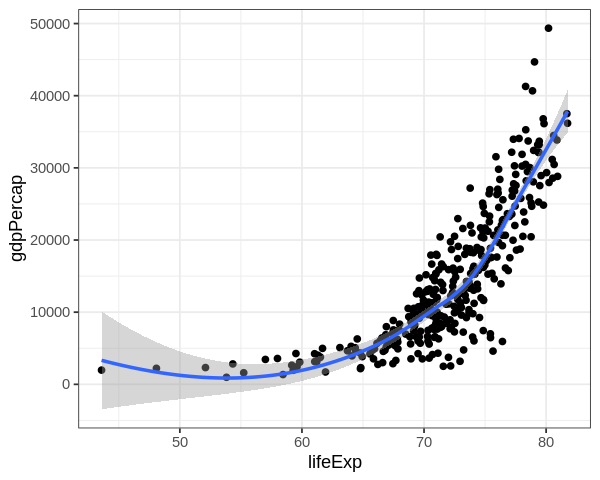

In [ ]:
# YOUR SOLUTION HERE

gapminder %>%
  filter(continent == "Europe") %>%
  ggplot(aes(x=lifeExp, y=gdpPercap)) +
    geom_point() +
    geom_smooth() +
    theme_bw()

# Apparent positive relationship between life expectancy and GDP per Capita